# Pymaceuticals Inc.
---

### Analysis

- 1 : Some treatments, like Capomulin and Ramicane, appear to be more effective in reducing tumor size compared to Infubinol and Ceftamin.
- 2 : 
There is a positive correlation between mouse weight and tumor volume for mice treated with Capomuli
- 3 : 

The study includes an equal number of male and female mice, ensuring the results are applicable to both genders.
 

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Step 1: Load the data from CSV files and merge the DataFrames
mouse_metadata_path = "C:/users/messa/Pymaceuticals_Challenge/Resources/Mouse_metadata.csv"
study_results_path = "C:/users/messa/Pymaceuticals_Challenge/Resources/Study_results.csv"
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

In [3]:
# Step 2: Check for any mouse ID with duplicate time points and create a cleaned DataFrame
duplicate_mouse_id = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
cleaned_data = merged_data[~merged_data["Mouse ID"].isin(duplicate_mouse_id["Mouse ID"])]

In [4]:
# Step 3: Generate a DataFrame of summary statistics
summary_statistics = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

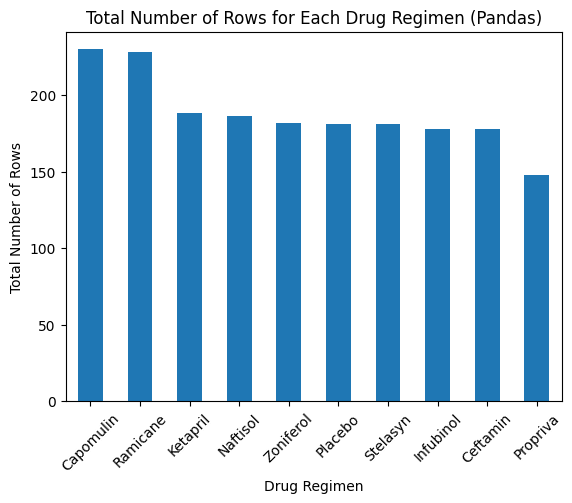

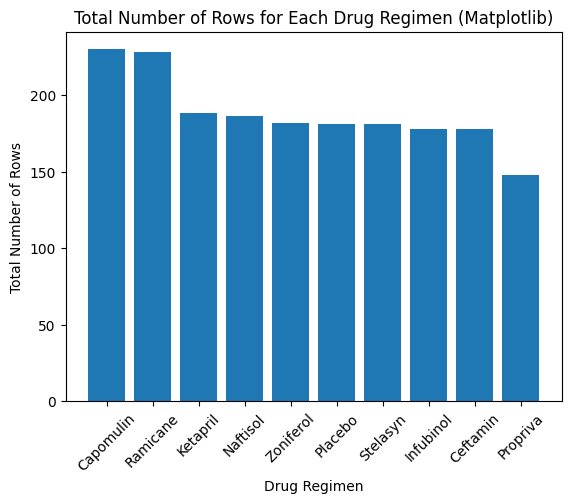

In [5]:
# Step 4: Create bar charts to show the total number of rows for each drug regimen
bar_chart_data = cleaned_data["Drug Regimen"].value_counts()
bar_chart_data.plot(kind="bar", title="Total Number of Rows for Each Drug Regimen (Pandas)")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.xticks(rotation=45)
plt.show()

plt.bar(bar_chart_data.index, bar_chart_data.values)
plt.title("Total Number of Rows for Each Drug Regimen (Matplotlib)")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.xticks(rotation=45)
plt.show()

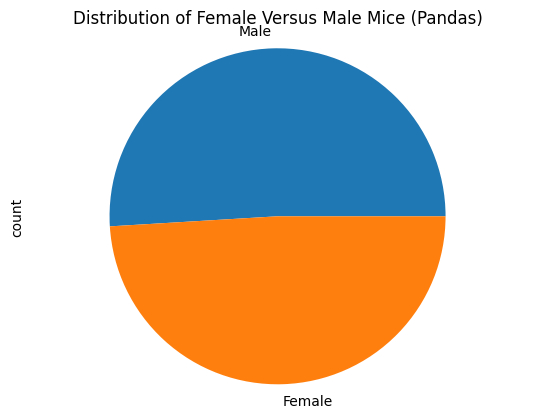

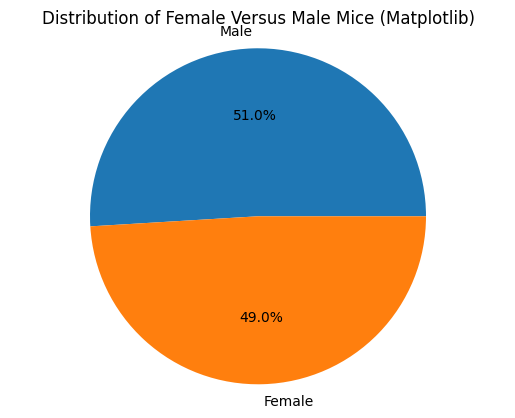

In [6]:
# Step 5: Create pie charts to show the distribution of female versus male mice
pie_chart_data = cleaned_data["Sex"].value_counts()
pie_chart_data.plot(kind="pie", title="Distribution of Female Versus Male Mice (Pandas)")
plt.axis("equal")
plt.show()

plt.pie(pie_chart_data.values, labels=pie_chart_data.index, autopct='%1.1f%%')
plt.title("Distribution of Female Versus Male Mice (Matplotlib)")
plt.axis("equal")
plt.show()

In [7]:
# Step 6: Calculate the final tumor volume of each mouse for the most promising treatment regimens
promising_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = cleaned_data[cleaned_data["Drug Regimen"].isin(promising_treatments)]
final_tumor_volume = final_tumor_volume.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"].last().reset_index()

In [8]:
# Step 7: Calculate the quartiles and IQR to find potential outliers
for drug in promising_treatments:
    # Select the final tumor volume for the current drug from the DataFrame
    drug_final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    
    # Calculate the quartiles and IQR for the current drug's final tumor volume
    quartiles = drug_final_tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Identify potential outliers for the current drug
    outliers = drug_final_tumor_volume[(drug_final_tumor_volume < lower_bound) | (drug_final_tumor_volume > upper_bound)]
    print(f"Potential Outliers for {drug}: {outliers}")

Potential Outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential Outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential Outliers for Infubinol: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


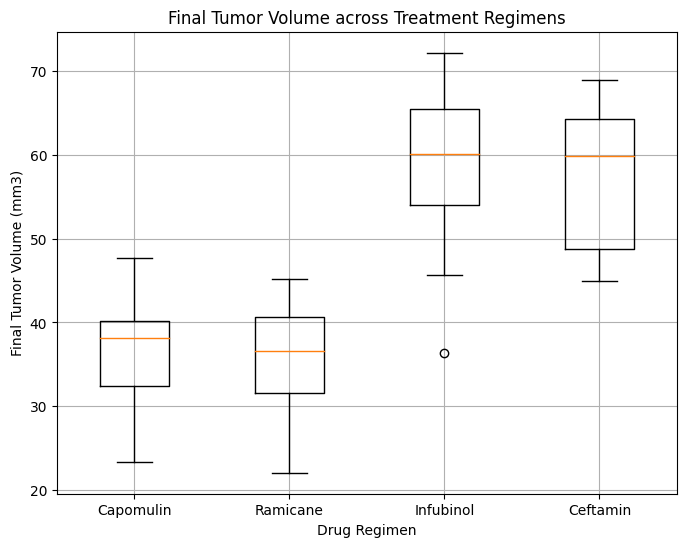

In [9]:
# Step 8: Generate box plots for the final tumor volume across the treatment regimens
data_by_drug = {}  # Dictionary to store final tumor volume for each drug
for drug in promising_treatments:
    data_by_drug[drug] = final_tumor_volume[final_tumor_volume["Drug Regimen"] == drug]["Tumor Volume (mm3)"]

plt.figure(figsize=(8, 6))
plt.boxplot(data_by_drug.values(), labels=data_by_drug.keys())
plt.title("Final Tumor Volume across Treatment Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.grid(True)
plt.show()

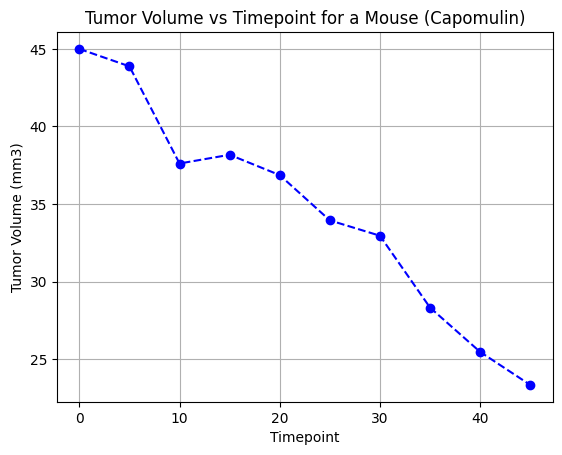

In [10]:
# Step 9: Select a single mouse treated with Capomulin and generate a line plot
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
single_mouse = capomulin_data[capomulin_data["Mouse ID"] == "s185"]
plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"], marker='o', linestyle='--', color='b')
plt.title("Tumor Volume vs Timepoint for a Mouse (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()

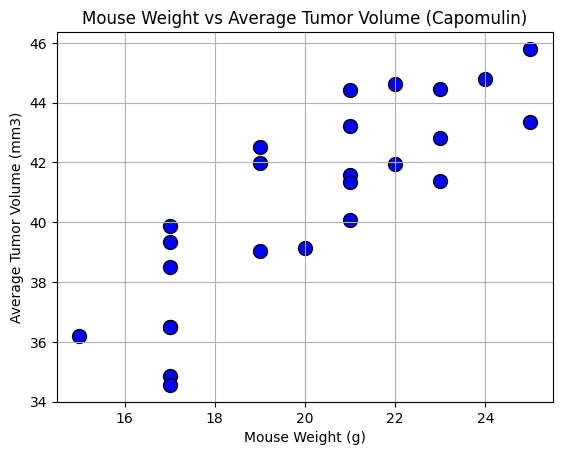

In [11]:
# Step 10: Generate a scatter plot of mouse weight vs average observed tumor volume for Capomulin
capomulin_grouped = capomulin_data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})
mouse_weights = capomulin_grouped["Weight (g)"]
average_tumor_volume = capomulin_grouped["Tumor Volume (mm3)"]

plt.scatter(mouse_weights, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black', s=100)
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

In [12]:
# Step 11: Calculate correlation coefficient and linear regression model
correlation_coefficient = round(np.corrcoef(mouse_weights, average_tumor_volume)[0, 1], 2)
print(f"Correlation Coefficient: {correlation_coefficient}")

slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)
regress_values = mouse_weights * slope + intercept

Correlation Coefficient: 0.84


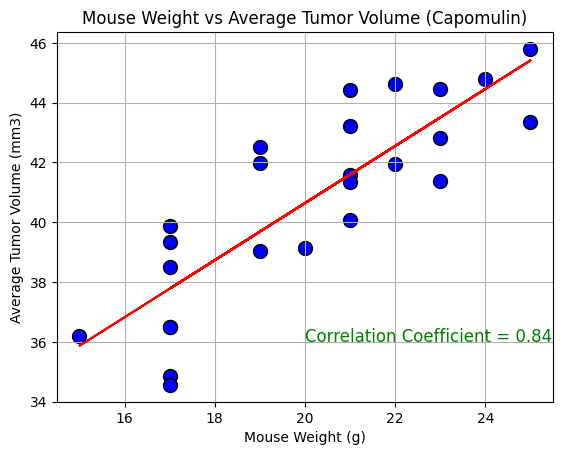

In [13]:
# Step 12: Plot the linear regression model on the scatter plot
plt.scatter(mouse_weights, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black', s=100)
plt.plot(mouse_weights, regress_values, 'r-')
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.annotate(f"Correlation Coefficient = {correlation_coefficient}", (20, 36), fontsize=12, color='green')
plt.show()
